# SVM   (Support vector Machines)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# We are giving column name
# We get this dataset from online iris data uci

cols =  ['Sepel length', 'Sepal width', 'Petal length', 'Petal width', 'Class']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None, names= cols)
df



,Sepel length,Sepal width,Petal length,Petal width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.describe()

,Sepel length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


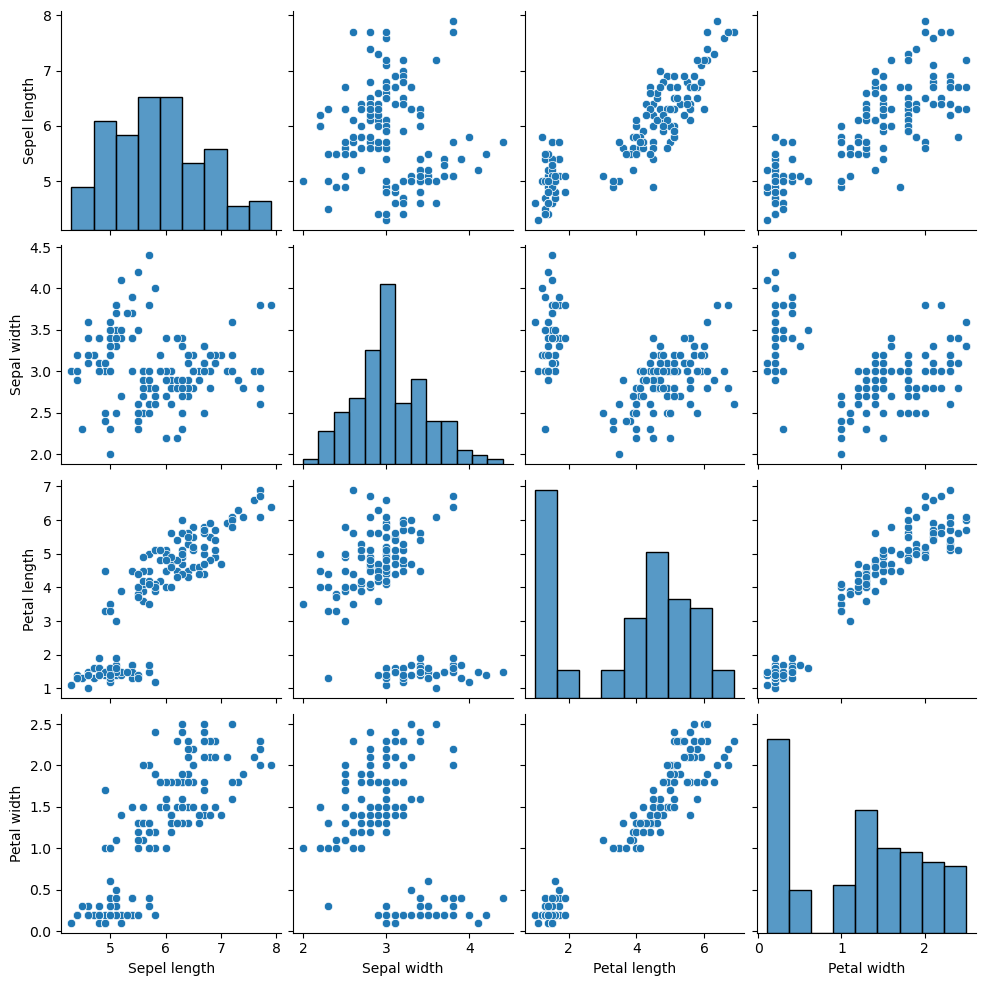

In [4]:
sns.pairplot(df)

- By looking at the graph there is only 2 class

In [5]:
df['Class'].value_counts()

# There is 3 descrete values

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Class, dtype: int64

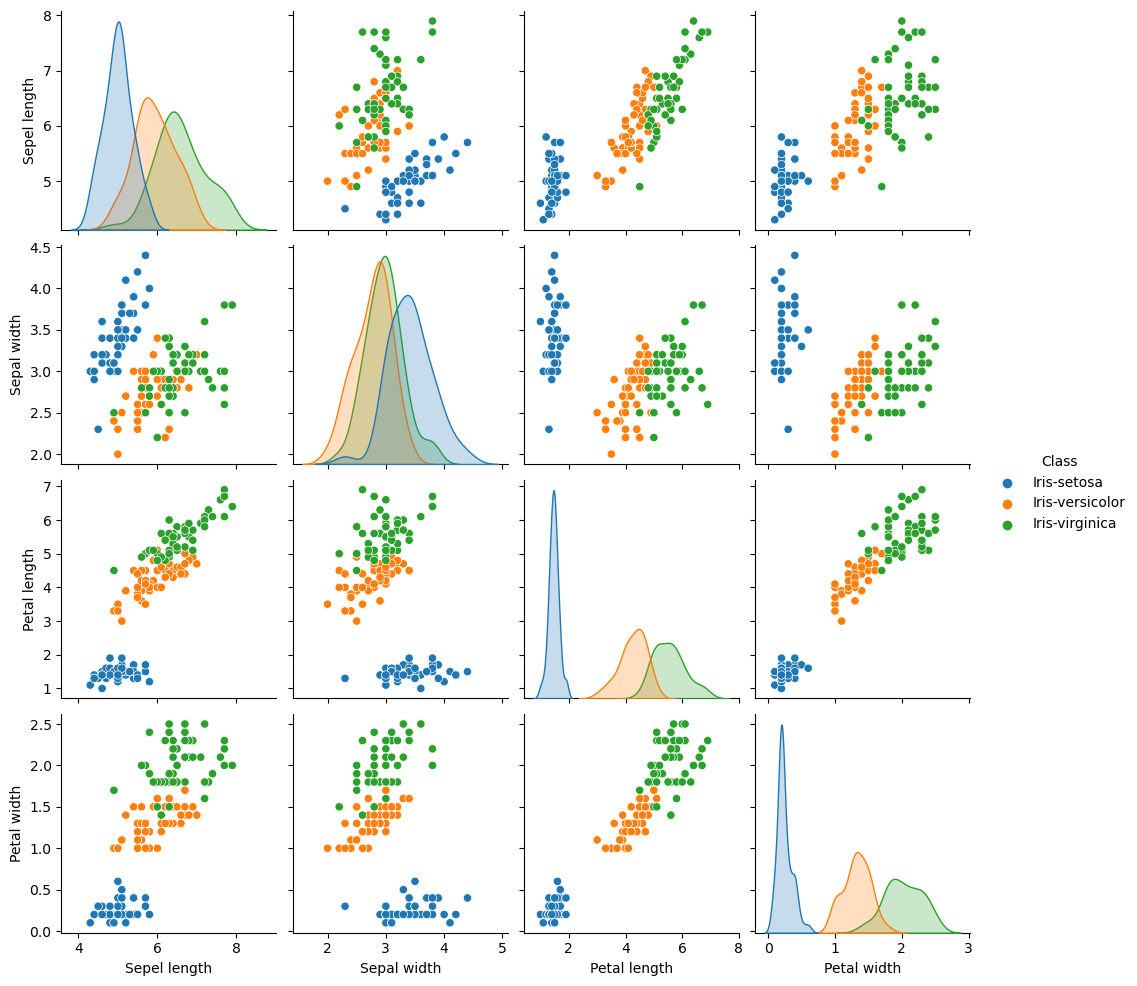

In [6]:
sns.pairplot(df, hue = 'Class')

In [7]:
df.head(2)

,Sepel length,Sepal width,Petal length,Petal width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


- Convert categorical data in to numerical

In [8]:
# We use label encoder
# If we use One hot Encoder then it creates 3 seperate columns

from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()

df.iloc[:,-1] = le.fit_transform(df.iloc[:,-1])

In [10]:
df.head()

,Sepel length,Sepal width,Petal length,Petal width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
df['Class'].value_counts()

0    50
1    50
2    50
Name: Class, dtype: int64

In [12]:
 from sklearn.svm import SVC

In [13]:
svc = SVC()

# c = We put additional error(it is inversly proportional to the regularization)
# If we take minimum value of C additional error will be more , and vice versa 

# gamma = It is the circumference of circle

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x = df.iloc[:,:-1]
y = df['Class']

In [16]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size= 0.25, random_state= 1)

In [17]:
svc.fit(xtrain,ytrain)

ypred = svc.predict(xtest)

In [18]:
ypred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0])

In [19]:
# Evaluation of model

from sklearn.metrics import classification_report, accuracy_score

In [20]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [21]:
# Check weather the model is underfitting or overfitting

In [22]:
print(svc.score(xtrain,ytrain), svc.score(xtest,ytest))

0.9732142857142857 0.9736842105263158


- It is generalized model

# Hyperparameter tuning

- It used to find optimal value for gamma, c, & kernal

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
SVC()


SVC()

In [50]:
params = {
    'C' : [0.1,0.001,1,2,3,4,5],
    'kernel' : ['linear', 'poly', 'rbf'],
    'gamma' : [0.1,0.001,1,2,5]
}

In [51]:
grid = GridSearchCV(SVC(), param_grid= params, verbose = 0)

# Verbose= 2 = to show the combination
# Verbose = 0 = do not show the combination

In [52]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.001, 1, 2, 3, 4, 5],
                         'gamma': [0.1, 0.001, 1, 2, 5],
                         'kernel': ['linear', 'poly', 'rbf']})

In [55]:
 # To show optimal values
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}

In [56]:
svc = SVC(C= 1, gamma= 0.1, kernel= 'linear')

In [57]:
svc.fit(xtrain,ytrain)

ypred = svc.predict(xtest)

In [58]:
print('Training Accuracy is;' , svc.score(xtrain,ytrain))
print('Testing Accuracy is;' , svc.score(xtest,ytest))

Training Accuracy is; 0.9821428571428571
Testing Accuracy is; 1.0
